# Procesamiento de datos utilizando python

##### `Procesamiento numérico`  


>`> Extracción de datos`

In [ ]:
# Importando Librerias
import pandas as pd                 #Pandas
import matplotlib.pyplot as plt     #Matplot
import numpy as np                  #Numpy
import seaborn as sns               #seaborn
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','black','white']

In [ ]:
pd.set_option("display.max_rows",4)#Cantidad de filas a mostrar
pd.set_option("display.max_columns",13)#Cantidad de columnas a mostrar

`vistaexaminados y vistaasistencias`

In [ ]:
json="https://tecnologica.utec.edu.sv/fica/services/vistaexaminados.php"
dfExam = pd.read_json(json)
dfAsis = pd.read_json('https://tecnologica.utec.edu.sv/fica/services/vistaasistencias.php')
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Facultad de Derecho,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Facultad de Ciencias Sociales,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,-1,PRESENCIAL
9379,2023-04-11,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


>`> Limpieza de datos`

`vistaasistencias`

In [ ]:
dfAsis.info()#sin valores nulos cantidad de registros son 9380 @ columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       9380 non-null   object
 1   codigo      9380 non-null   object
 2   facultad    9380 non-null   object
 3   area        9380 non-null   object
 4   materia     9380 non-null   object
 5   seccion     9380 non-null   int64 
 6   horario     9380 non-null   object
 7   dias        9380 non-null   object
 8   Inscritos   9380 non-null   int64 
 9   Asistencia  9380 non-null   int64 
 10  Modalidad   9380 non-null   object
dtypes: int64(3), object(8)
memory usage: 806.2+ KB


In [ ]:
# validando que seran utililes las columnas categoricas

cols_cat=['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Modalidad']
for col in cols_cat:
  print(f'columna {col}: {dfAsis[col].nunique()} subniveles')
#si existiera un solo nivel no nos serviria para analizar pues no habria comparativa por 
#lo que las variables categoricas deben ser mayor a uno, en cambio si tienen demaciados 
#datos dependera como se realice el analisis para que nos sirva

columna fecha: 49 subniveles
columna codigo: 450 subniveles
columna facultad: 4 subniveles
columna area: 9 subniveles
columna materia: 423 subniveles
columna seccion: 26 subniveles
columna horario: 17 subniveles
columna dias: 14 subniveles
columna Modalidad: 2 subniveles


In [ ]:
# Validadndo si las columnas numericas 
dfAsis.describe().head(8)#si la desviasion estandar es cero significa que todos los datos son iguales

,seccion,Inscritos,Asistencia
count,9380.000000,9380.000000,9380.000000
mean,2.773134,59.427079,48.705650
std,3.367513,31.304157,26.975018
min,1.000000,1.000000,-1.000000
25%,1.000000,35.000000,28.000000
50%,1.000000,56.000000,45.000000
75%,3.000000,82.000000,68.000000
max,27.000000,140.000000,131.000000


In [ ]:
ModfColums=dfAsis.columns
ModfColums#mostrando columnas actuales

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Inscritos', 'Asistencia', 'Modalidad'],
      dtype='object')

In [ ]:
# utilizando el método rename para cambiar el nombre de las columnas
# dfAsis.rename(columns={"Inscritos": "inscritos", "Asistencia": "asistencia", "Modalidad": "modalidad"}, inplace=True)
dfAsis.rename(columns={"Inscritos": "inscritos", "Asistencia": "asistencia", "Modalidad": "modalidad"}, inplace=True)
# imprime los nombres de las columnas actualizadas
dfAsis.columns

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'inscritos', 'asistencia', 'modalidad'],
      dtype='object')

In [ ]:
# Validando si existen en el dataframe filas repetidas

print(f"tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}")
dfAsis.drop_duplicates(inplace=True)
print(f'tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}')

tamaño del DF antes de eliminar filas repetidas: (9380, 11)
tamaño del DF antes de eliminar filas repetidas: (9380, 11)


In [ ]:
# Eliminando valores mayores a 130 usando el "outler"

print(f"tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}")
dfAsis=dfAsis[dfAsis['asistencia']<=130]
print(f'tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}')
#9380 rows - 9378 rows = 2 rows eliminados por ser mayores a 130

tamaño del DF antes de eliminar filas repetidas: (9380, 11)
tamaño del DF antes de eliminar filas repetidas: (9378, 11)


In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130]
---


In [ ]:
#haciendo busqueda de un registro; nos damos cuenta que hay registros con espacios en blanco
datos_filtrados = dfAsis[dfAsis['codigo'] == 'EPRO-AC  ']
print(datos_filtrados)

           fecha     codigo                       facultad          area   
138   2023-01-19  EPRO-AC    Facultad de Ciencias Sociales  ANTROPOLOGIA  \
205   2023-01-19  EPRO-AC    Facultad de Ciencias Sociales  ANTROPOLOGIA   
...          ...        ...                            ...           ...   
9224  2023-03-06  EPRO-AC    Facultad de Ciencias Sociales  ANTROPOLOGIA   
9315  2023-03-07  EPRO-AC    Facultad de Ciencias Sociales  ANTROPOLOGIA   

     materia  seccion      horario    dias  Inscritos  Asistencia   Modalidad  
138    ÉTICA        7  17:00-18:30  Ma-Jue        129         110    EN LINEA  
205    ÉTICA        2  06:30-08:00  Ma-Jue         36           0  PRESENCIAL  
...      ...      ...          ...     ...        ...         ...         ...  
9224   ÉTICA        8  18:40-20:10  Lu-Mie        128         100    EN LINEA  
9315   ÉTICA        2  06:30-08:00  Ma-Jue         36          33  PRESENCIAL  

[124 rows x 11 columns]


In [ ]:
# limpiar espacios en blancos
# Iterarando sobre las columnas del DataFrame
for columna in dfAsis.columns:
    # Verificando si las columnas son de tipo string
    if dfAsis[columna].dtype == 'object':
        # Eliminando los espacios en blanco de cada registro en las columnas coinsidentes
        dfAsis.loc[:, columna] = dfAsis[columna].str.strip()        

In [ ]:
datos_filtrados = dfAsis[dfAsis['codigo'] == 'EPRO-AC']
print(datos_filtrados)#Verificando que ya no hayan espacios en blancos usando filtro 'EPRO-AC'

           fecha   codigo                       facultad          area   
138   2023-01-19  EPRO-AC  Facultad de Ciencias Sociales  ANTROPOLOGIA  \
205   2023-01-19  EPRO-AC  Facultad de Ciencias Sociales  ANTROPOLOGIA   
...          ...      ...                            ...           ...   
9224  2023-03-06  EPRO-AC  Facultad de Ciencias Sociales  ANTROPOLOGIA   
9315  2023-03-07  EPRO-AC  Facultad de Ciencias Sociales  ANTROPOLOGIA   

     materia  seccion      horario    dias  Inscritos  Asistencia   Modalidad  
138    ÉTICA        7  17:00-18:30  Ma-Jue        129         110    EN LINEA  
205    ÉTICA        2  06:30-08:00  Ma-Jue         36           0  PRESENCIAL  
...      ...      ...          ...     ...        ...         ...         ...  
9224   ÉTICA        8  18:40-20:10  Lu-Mie        128         100    EN LINEA  
9315   ÉTICA        2  06:30-08:00  Ma-Jue         36          33  PRESENCIAL  

[124 rows x 11 columns]


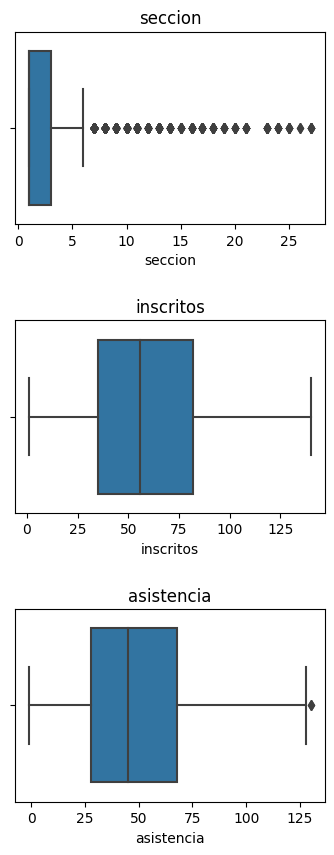

In [ ]:
#validando valores extremos de las columnas numericas

cols_num=['seccion', 'inscritos', 'asistencia']
fig, ax=plt.subplots(nrows=3,ncols=1,figsize=(4,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col,data=dfAsis,ax=ax[i])
    ax[i].set_title(col)

In [ ]:
transFact=dfAsis.facultad
list(transFact.drop_duplicates())#virificando registros unicos

['Facultad de Derecho',
 'Facultad de Informática y Ciencias Aplicadas',
 'Facultad de Ciencias Empresariales',
 'Facultad de Ciencias Sociales']

In [ ]:
# creando un diccionario para mapear los nombres antiguos y cambiarlos a los nuevos
mapeo_Fac = {"Facultad de Derecho": "Fac_Der", 
            "Facultad de Informática y Ciencias Aplicadas": "Fac_InCa",
            "Facultad de Ciencias Empresariales": "Fac_CiEmp",
            "Facultad de Ciencias Sociales": "Fac_CiSo"
            }
# utilizando el método replace para cambiar los nombres de los registros
dfAsis.loc[:, "facultad"] = dfAsis["facultad"].replace(mapeo_Fac)
# dfAsis["facultad"] = dfAsis["facultad"].replace(mapeo_Fac)

# mostrar la columna actualizada
print(dfAsis["facultad"])

0        Fac_Der
1       Fac_InCa
          ...   
9378    Fac_CiSo
9379    Fac_InCa
Name: facultad, Length: 9378, dtype: object


In [ ]:
# Eliminar todos los registros unicos segun el código, horario y seccion contra fecha 
fecha_counts = dfAsis.groupby(['codigo', 'horario', 'seccion'])['fecha'].nunique()

# Filtrar los registros en los que hay más de una fecha
indices_a_eliminar = fecha_counts[fecha_counts == 1].index

# Eliminar los registros correspondientes a las combinaciones de código, horario y sección con una única fecha
dfAsis = dfAsis[~dfAsis.set_index(['codigo', 'horario', 'seccion']).index.isin(indices_a_eliminar)]

In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion "asistencia"
transAsis = dfAsis['asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130]
---


>>NO MODF LOS GRAFICOS DE DIPERSION, SON UN ANTES Y UN DESPUES

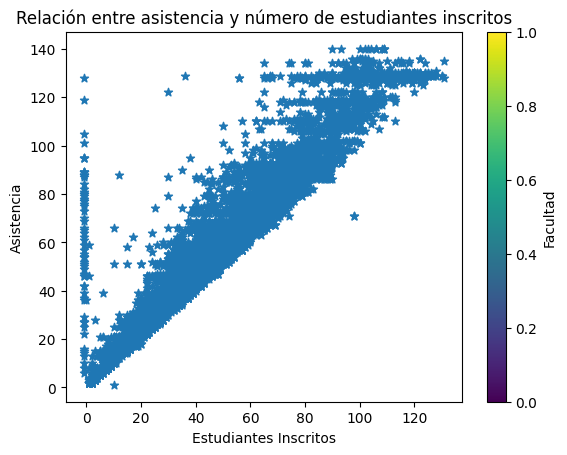

In [ ]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['Asistencia'], dfAsis['Inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

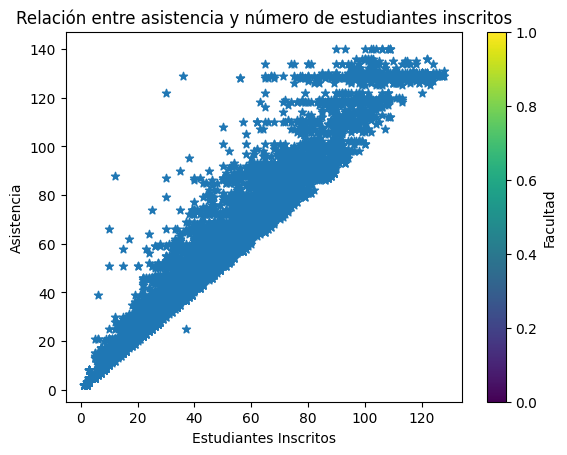

In [ ]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

>`> Transformación de datos`

`vistaasistencias`

In [ ]:

# cambiando el valor de la asistencia por valor minimo si el valor de la asistencia 
# es mayor al de los inscritos
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    seccion = row['seccion']
    dias = row['dias']
    asistencia = row['asistencia']
    inscritos = row['inscritos']
    
    if asistencia > inscritos:
        min_asistencia = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario) & (dfAsis['seccion'] == seccion) & (dfAsis['dias'] == dias)]['asistencia'].min()
        if not pd.isnull(min_asistencia):
            dfAsis.at[index, 'asistencia'] = min_asistencia
# # Mostrar el DataFrame modificado
# print(dfAsis)

In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion "asistencia"
transAsis = dfAsis['asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
---


In [ ]:
# Definimos el umbral del valor que vamos a sustituir por la media segun si es menor al umbral
# y asistencia sea mayor a inscritos
umbral = 5

# agrupando los datos del DataFrame dfAsis según las columnas 'codigo', 'horario' y 'dias' 
# y luego calculamos la media y hacemos redondeo en la columna 'Asistencia' dentro de cada 
# grupo.
media_asistencias = dfAsis.groupby(['codigo', 'horario', 'dias'])['asistencia'].mean().round()

# Iterar sobre cada fila del DataFrame
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    asistencia = row['asistencia']
    inscritos = row['inscritos']

    # Verificar si el valor está dentro del umbral
    if asistencia < umbral:
        # Verificar si cumple las condiciones de código, horario y días
        if (codigo, horario, dias) in media_asistencias.index:
            # Calcular la media de asistencias para el código, horario y días específicos
            media = media_asistencias[(codigo, horario, dias)]
            
            # Sustituir el valor dentro del umbral por la media de asistencias
            dfAsis.at[index, 'asistencia'] = media
        else:
            # No se encontró la combinación de código, horario y días en las medias calculadas
            # No se realiza ninguna sustitución
            pass

    # Verificar si la asistencia es mayor que los inscritos
    if asistencia > inscritos:
        # Obtener la asistencia más alta dentro del rango de opciones anteriores
        asistencia_maxima = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario) 
                                   & (dfAsis['dias'] == dias)]['asistencia'].max()
        
        # Sustituir el valor de asistencia por la asistencia máxima
        dfAsis.at[index, 'asistencia'] = asistencia_maxima
dfAsis.loc[:, 'asistencia'] = dfAsis['asistencia'].astype(int)

In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
---
Sección 2:
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
---
Sección 3:
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
---


In [ ]:
# Calcular la columna de Inasistencia
dfAsis = dfAsis.assign(inasistencia=dfAsis['inscritos'] - dfAsis['asistencia'])

In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['inasistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-43, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 69, 72, 76, 92, 93]
---


In [ ]:
# Reemplazar los rangos de los horarios por "mañana" y "tarde"
dfAsis['horario'] = dfAsis['horario'].apply(lambda x: 'mañana' if int(x[:2]) < 12 else 'tarde')

In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['horario']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')
# dfAsis

Sección 1:
['mañana', 'tarde']
---


,fecha,codigo,facultad,area,materia,seccion,horario,dias,inscritos,asistencia,modalidad,inasistencia
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,mañana,Ma-Jue,75,70,EN LINEA,5
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,mañana,Ma-Jue,44,26,PRESENCIAL,18
...,...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,mañana,Ma-Jue,88,76,PRESENCIAL,12
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,mañana,Ma-Jue,88,80,PRESENCIAL,8


In [ ]:
# Creando diccionario para mapear meses
meses = {
    '01': 'ENERO',
    '02': 'FEBRERO',
    '03': 'MARZO',
    '04': 'ABRIL',
    '05': 'MAYO',
    '06': 'JUNIO'
}

dfAsis['fecha'] = pd.to_datetime(dfAsis['fecha']).dt.strftime('%m-%Y')
dfAsis['fecha'] = dfAsis['fecha'].str.split('-', expand=True)[0].map(meses) + ' ' + dfAsis['fecha'].str.split('-', expand=True)[1]

In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['fecha']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
['ABRIL 2023', 'ENERO 2023', 'FEBRERO 2023', 'MARZO 2023']
---


In [ ]:
# Verificar si la asistencia es mayor a los inscritos y sustituir el valor
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    asistencia = row['asistencia']
    inscritos = row['inscritos']
    
    if asistencia > inscritos:
        # Verificar si el código corresponde con el día y horario específico
        media_asistencias = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario)
                                    & (dfAsis['dias'] == dias)]['asistencia'].mean().round()
        if not pd.isnull(media_asistencias):
            # Convertir el valor de asistencia a entero eliminando los decimales
            media_asistencias = int(media_asistencias)
            # Sustituir el valor de asistencia por la media
            dfAsis.at[index, 'asistencia'] = media_asistencias
# Convertir la columna "Asistencia" a tipo de datos entero
dfAsis['asistencia'] = dfAsis['asistencia'].astype(int)

In [ ]:
transAsis = dfAsis['inasistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-43, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 69, 72, 76, 92, 93]
---


In [ ]:
# Mostrar el dataframe modificado completo
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,inscritos,asistencia,modalidad,inasistencia
0,ENERO 2023,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,mañana,Ma-Jue,75,70,EN LINEA,5
1,ENERO 2023,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,mañana,Ma-Jue,44,26,PRESENCIAL,18
...,...,...,...,...,...,...,...,...,...,...,...,...
9378,MARZO 2023,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,mañana,Ma-Jue,88,76,PRESENCIAL,12
9379,ABRIL 2023,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,mañana,Ma-Jue,88,80,PRESENCIAL,8


>`> Estadísticas generadas`

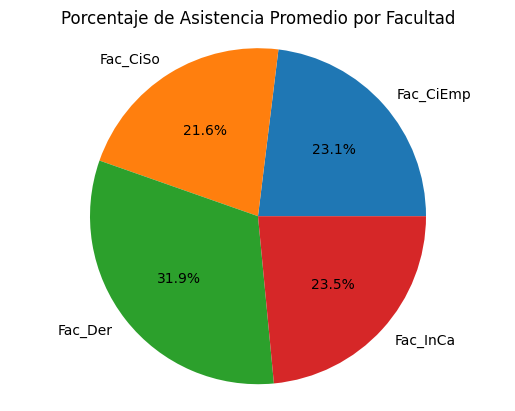

In [ ]:
# Gráfico de pastel de la asistencia agrupados por facultad
asistencia_promedio_facultad = dfAsis.groupby('facultad')['inasistencia'].mean()

plt.pie(asistencia_promedio_facultad, labels=asistencia_promedio_facultad.index, 
        autopct='%1.1f%%')
plt.title('Porcentaje de Asistencia Promedio por Facultad')
plt.axis('equal')
plt.show()

`vistaasistencias`

01- Cantidad promedio de asistencias e inasistencias por fecha
###### lo que se muestra en el grafico es una comparativa de cuanta gente asiste por facultad y como a razon del tiempo esa asistencia puede fluctuar
02- Cantidad promedio de estudiantes inscritos por modalidad
###### cual modalidad es mas elegida
03- ¿Cuál es la cantidad promedio de estudiantes inscritos por área?
###### nos muestra que area es la que los estudiantes mas frefieren elegir como campo de estudio
04- ¿Cuál es la proporción de estudiantes que asisten en cada modalidad de enseñanza?
###### de esta forma sabremos cual modalidad prefieren estudiar los estudiantes
05- ¿Cuál es la proporción de estudiantes que elegijen un area de estudio segun la modalidad de enseñanza??
###### este grafico nos muestra en que modalidad los estudiantes prefieren estudiar dependiendo del area de estudio
06- ¿cual es la asistencia de cada día segun el horario?
###### de esta forma se vera cual es la regularidad con la que los estudiantes asisten y cual es el horario mas elegido por ellos
07- Promedio de asistencia e inasistencias por facultad
###### de esta forma sabremos que facultad es la que se mantiene en el tiempo y cual es la que mayor inasistencia tiene
08- Cantidad de Estudiantes Inscritos por Materia, según Área y Modalidad
###### en este grafico nos mostraria que modalidad es la mas elegida segun la materia
09- Promedio de Inasistencias por Modalidad
###### nos muestra la comparativa de cuan modo existe mayor afluencia de inasistencia
10-promedio de inscritos por modalidad y horario 
###### cual es la preferencia de los horarios segun la modalidad

>`> Presentación de resultados` 

`vistaasistencias`

>Cantidad promedio de asistencias e inasistencias por fecha

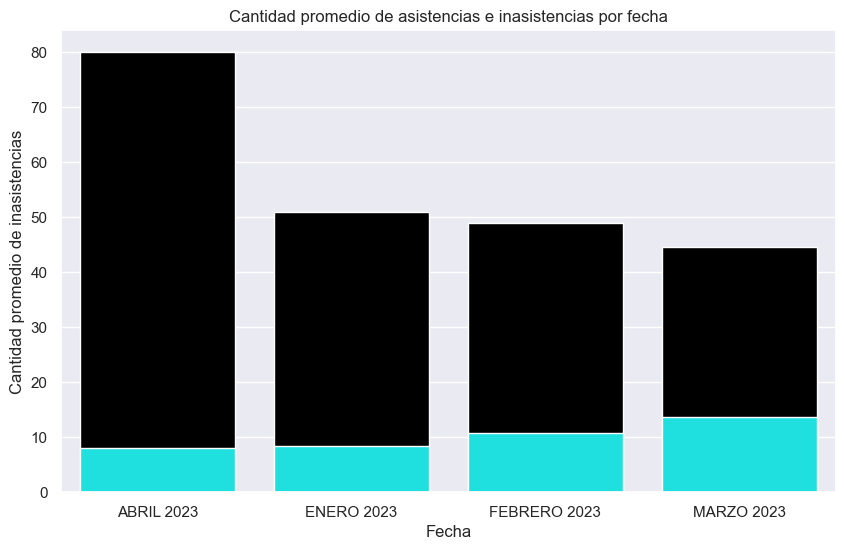

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por fecha y calcular el promedio de asistencias e inasistencias
fecha_avg_asistencias = dfAsis.groupby('fecha')['asistencia'].mean()
fecha_avg_inasistencias = dfAsis.groupby('fecha')['inasistencia'].mean()

# Crear la figura y el subgráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el gráfico de barra de asistencias
sns.barplot(x=fecha_avg_asistencias.index, y=fecha_avg_asistencias.values, color=colors[6], ax=ax)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad promedio de asistencias')
ax.set_title('Cantidad promedio de asistencias por fecha')

# Graficar el gráfico de barra de inasistencias
sns.barplot(x=fecha_avg_inasistencias.index, y=fecha_avg_inasistencias.values, color=colors[3], ax=ax)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad promedio de inasistencias')
ax.set_title('Cantidad promedio de asistencias e inasistencias por fecha')

# Mostrar el gráfico
plt.show()

>Cantidad promedio de estudiantes inscritos por modalidad

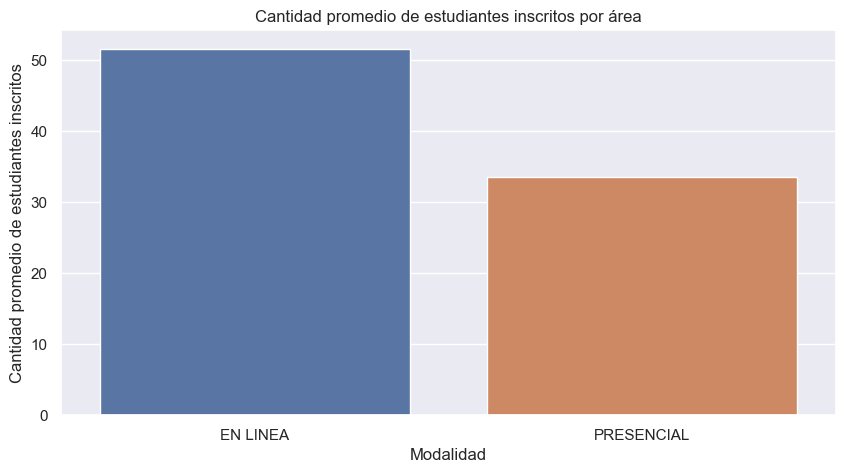

In [ ]:
# Calcular el promedio de estudiantes inscritos por área
area_avg_inscritos = dfAsis.groupby('modalidad')['inscritos'].mean().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Graficar el gráfico de barras
sns.barplot(x='modalidad', y='inscritos', data=area_avg_inscritos)

# Agregar etiquetas y título
plt.xlabel('Modalidad')
plt.ylabel('Cantidad promedio de estudiantes inscritos')
plt.title('Cantidad promedio de estudiantes inscritos por modalidad')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()


>¿Cuál es la cantidad promedio de estudiantes inscritos por área?

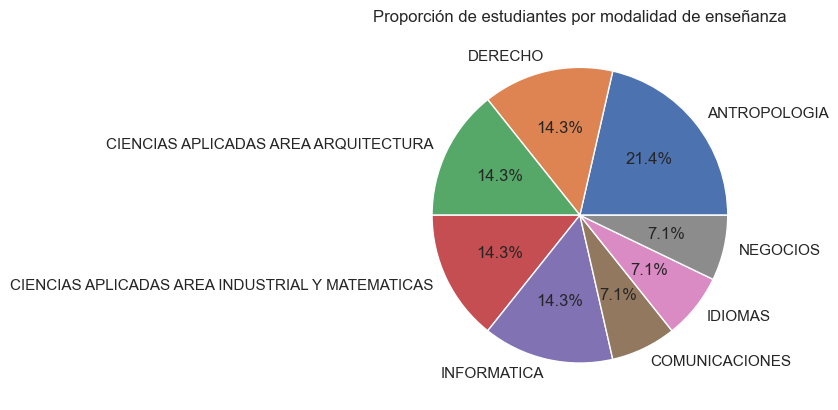

In [ ]:
modalidad_count = dfAsis['area'].value_counts()
proporciones = modalidad_count / dfAsis['area'].count()
labels = proporciones.index
plt.pie(proporciones, labels=labels, autopct='%1.1f%%')
plt.title('Proporción de estudiantes por modalidad de enseñanza')
plt.show()

>¿Cuál es la proporción de estudiantes que asisten en cada modalidad de enseñanza?

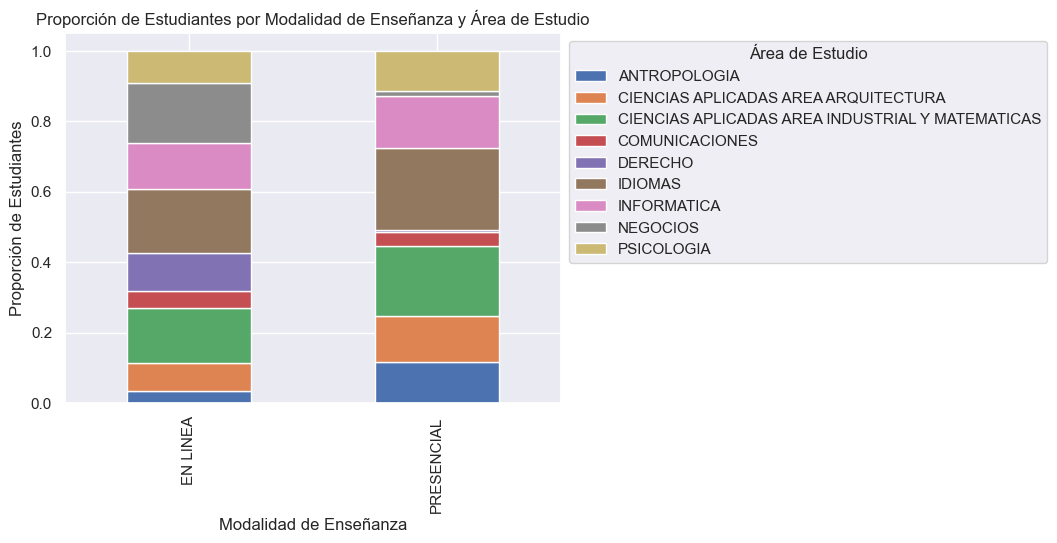

In [ ]:
# Agrupa los datos por la columna de modalidad de enseñanza y área de estudio, y cuenta 
# la cantidad de estudiantes en cada grupo:
grupo_modalidad_area = dfAsis.groupby(['modalidad', 'area']).size()
# Calcula la proporción dividiendo la cantidad de estudiantes en cada grupo entre el total 
# de estudiantes en esa modalidad de enseñanza:
proporciones = grupo_modalidad_area / grupo_modalidad_area.groupby(level=0).sum()
proporciones.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Modalidad de Enseñanza')
plt.ylabel('Proporción de Estudiantes')
plt.title('Proporción de Estudiantes por Modalidad de Enseñanza y Área de Estudio')
plt.legend(title='Área de Estudio', bbox_to_anchor=(1, 1))
plt.show()

>¿Cuál es la proporción de estudiantes que elegijen un area de estudio segun la modalidad de enseñanza?

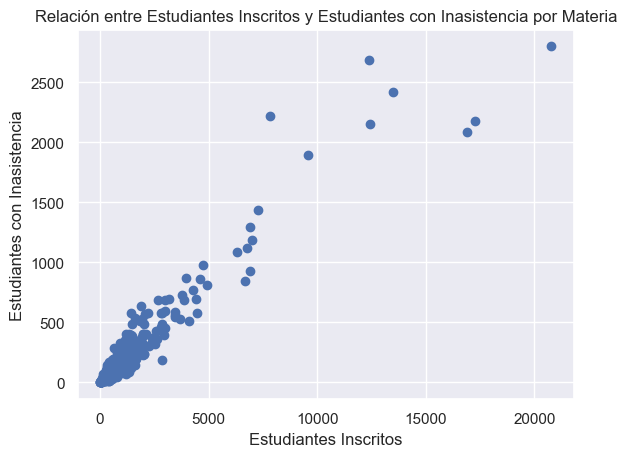

In [ ]:
# Agrupa los datos por materia y calcula la suma de estudiantes inscritos y 
# la cantidad de estudiantes con inasistencia en cada materia:
grupo_materia = dfAsis.groupby('materia')[['inscritos', 'inasistencia']].sum()
# Calcula la proporción de estudiantes con inasistencia dividiendo la cantidad 
# de estudiantes con inasistencia entre el número de estudiantes inscritos:
grupo_materia['proporcion_inasistencia'] = grupo_materia['inasistencia'] / grupo_materia['inscritos']
# Grafica la relación utilizando un gráfico de dispersión o de barras:
plt.scatter(grupo_materia['inscritos'], grupo_materia['inasistencia'])
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Estudiantes con Inasistencia')
plt.title('Relación entre Estudiantes Inscritos y Estudiantes con Inasistencia por Materia')
plt.show()

>¿cual es la asistencia de cada día segun el horario?

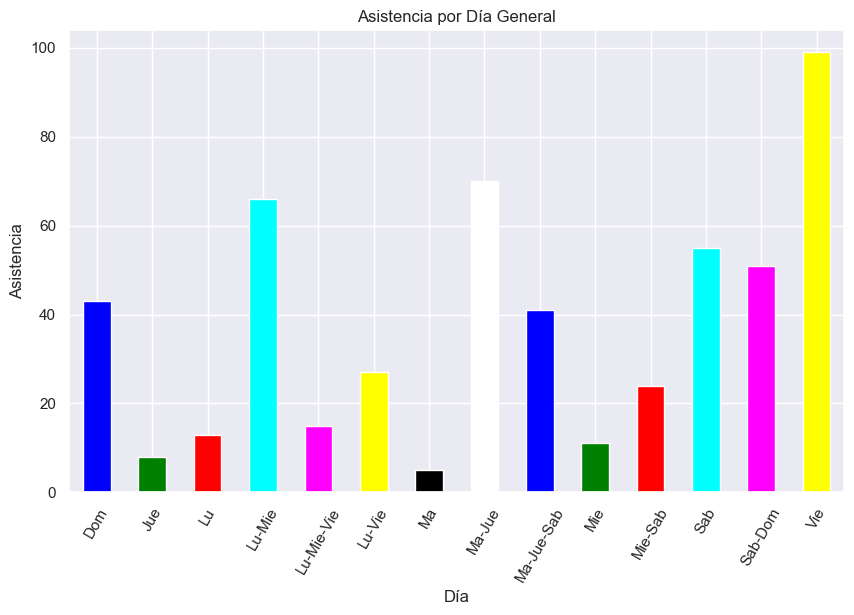

In [ ]:
# Elimina los valores duplicados de la columna "dias" utilizando el método drop_duplicates()
dfAsis = dfAsis.drop_duplicates(subset=['dias'])

# Agrupa los datos por "dias" y calcula la suma de asistencia en cada día 
# utilizando el método groupby() y la función sum():
asistencia_por_dia = dfAsis.groupby('dias')['asistencia'].mean()

# Genera el gráfico de barras con varios colores
plt.figure(figsize=(10, 6))
asistencia_por_dia.plot(kind='bar', color=colors)
plt.xlabel('Día')
plt.ylabel('Asistencia')
plt.title('Asistencia por Día General')
plt.xticks(rotation=60)
plt.show()

>Promedio de asistencia e inasistencias por facultad

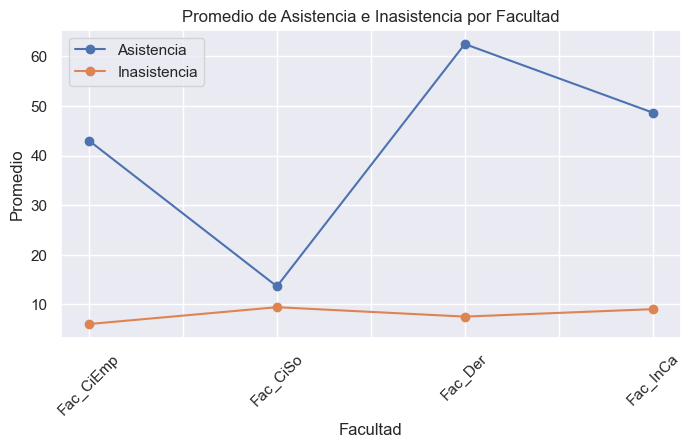

In [ ]:
# Agrupar los datos por facultad y calcular el promedio de asistencia y de inasistencia
promedio_asistencia_facultad = dfAsis.groupby('facultad')['asistencia'].mean()
promedio_inasistencia_facultad = dfAsis.groupby('facultad')['inasistencia'].mean()

# Generar el gráfico de líneas del promedio de asistencia y de inasistencia por facultad
plt.figure(figsize=(8, 4))
promedio_asistencia_facultad.plot(kind='line', marker='o', label='Asistencia')
promedio_inasistencia_facultad.plot(kind='line', marker='o', label='Inasistencia')
plt.xlabel('Facultad')
plt.ylabel('Promedio')
plt.title('Promedio de Asistencia e Inasistencia por Facultad')
plt.legend()
plt.xticks(rotation=45)
plt.show()




>Cantidad de Estudiantes Inscritos por Materia, según Área y Modalidad

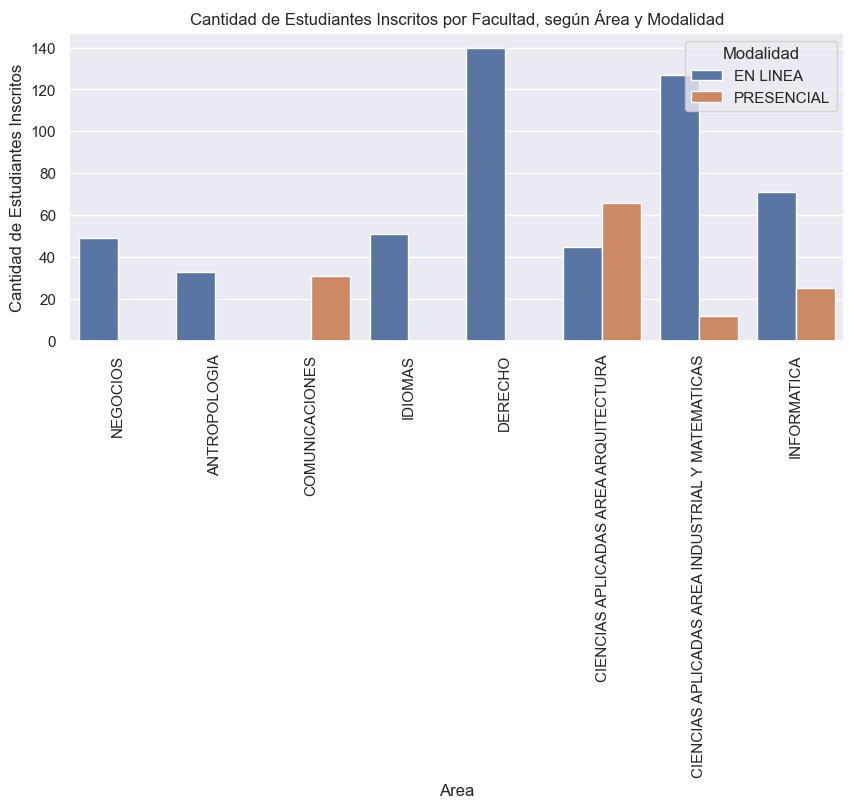

In [ ]:
# Agrupar los datos por materia, área y modalidad de enseñanza y calcular la suma de estudiantes inscritos
inscritos_por_materia_area_modalidad = dfAsis.groupby(['facultad', 'area', 'modalidad'])['inscritos'].sum().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Crear el gráfico de barras agrupadas
sns.barplot(x='area', y='inscritos', hue='modalidad', data=inscritos_por_materia_area_modalidad)

# Configurar etiquetas y título
plt.xlabel('Area')
plt.ylabel('Cantidad de Estudiantes Inscritos')
plt.title('Cantidad de Estudiantes Inscritos por Facultad, según Área y Modalidad')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar la leyenda
plt.legend(title='Modalidad')

# Mostrar el gráfico
plt.show()

>Promedio de Inasistencias por Modalidad

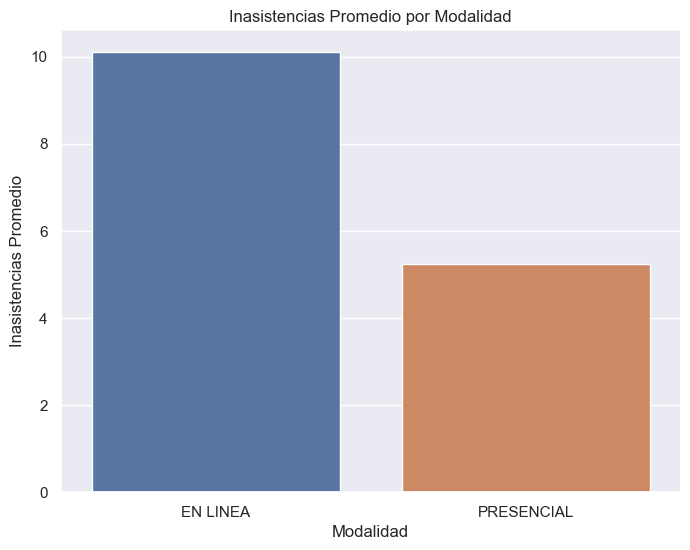

In [ ]:
# Agrupar los datos por modalidad y calcular la media de inasistencias en cada grupo
promedio_inasistencias_modalidad = dfAsis.groupby('modalidad')['inasistencia'].mean().reset_index()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el promedio de inasistencias por modalidad
sns.barplot(x='modalidad', y='inasistencia', data=promedio_inasistencias_modalidad, ax=ax)

# Configurar etiquetas de los ejes y título
ax.set_xlabel('Modalidad')
ax.set_ylabel('Inasistencias Promedio')
ax.set_title('Promedio de Inasistencias por Modalidad')

# Mostrar el gráfico
plt.show()

>promedio de inscritos por modalidad y horario 

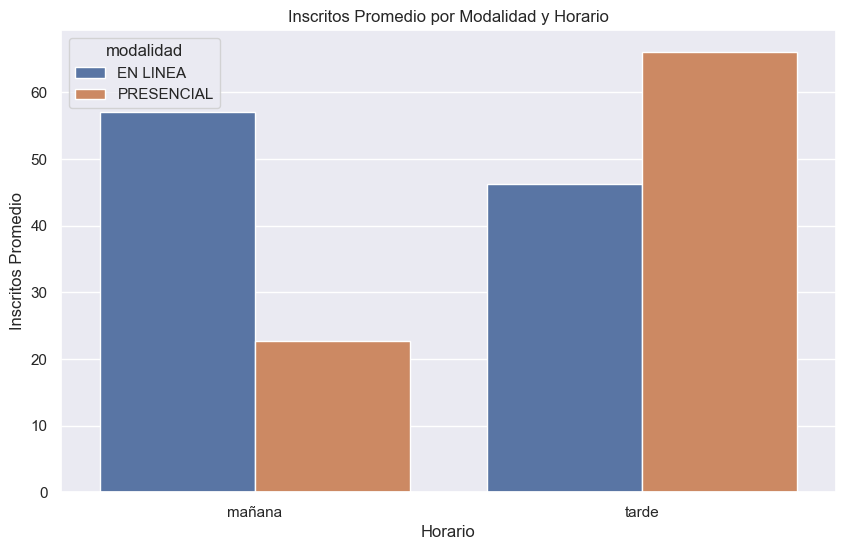

In [ ]:
# Agrupar los datos por modalidad y horario, y calcular el promedio de estudiantes inscritos en cada grupo
promedio_inscritos = dfAsis.groupby(['modalidad', 'horario'])['inscritos'].mean().reset_index()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el promedio de inscritos por modalidad y horario
sns.barplot(x='horario', y='inscritos', hue='modalidad', data=promedio_inscritos, ax=ax)

# Configurar etiquetas de los ejes y título
ax.set_xlabel('Horario')
ax.set_ylabel('Inscritos Promedio')
ax.set_title('Inscritos Promedio por Modalidad y Horario')

# Mostrar el gráfico
plt.show()

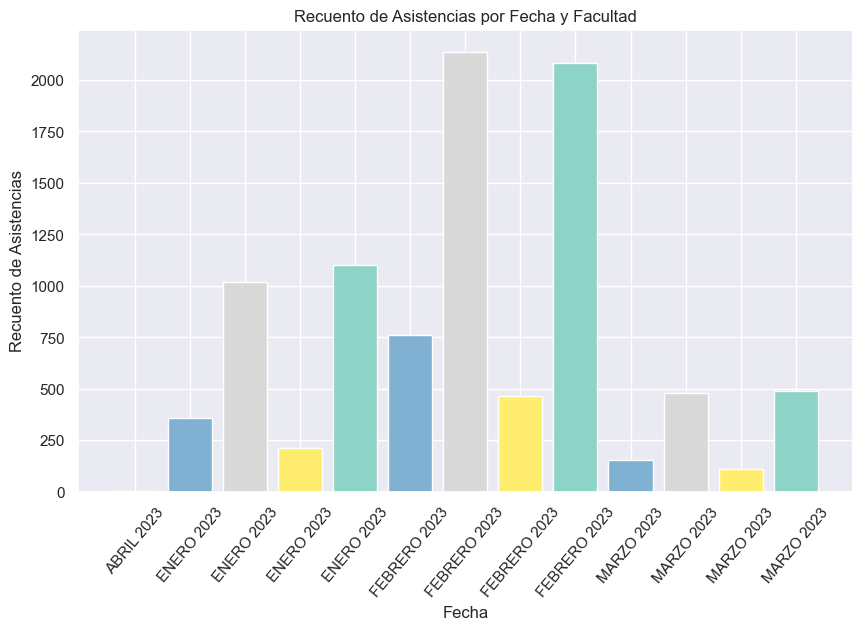

In [ ]:
# Agrupar por fecha y facultad y contar las asistencias en cada grupo
conteo_asistencias = dfAsis.groupby(['fecha', 'facultad'])['asistencia'].count()

# Reiniciar el índice para facilitar el acceso a los datos
conteo_asistencias = conteo_asistencias.reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Obtener la lista de fechas y asignar un color a cada una
fechas = conteo_asistencias['fecha'].unique()
colores = plt.cm .Set3(np.linspace(0, 1, len(fechas)))

# Graficar el recuento de asistencias por fecha y facultad
plt.bar(range(len(conteo_asistencias)), conteo_asistencias['asistencia'],color=colores)

# Configurar las etiquetas del eje x
plt.xticks(range(len(conteo_asistencias)), conteo_asistencias['fecha'], rotation=50)

# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Recuento de Asistencias')
plt.title('Recuento de Asistencias por Fecha y Facultad')

# Mostrar el gráfico
plt.show()




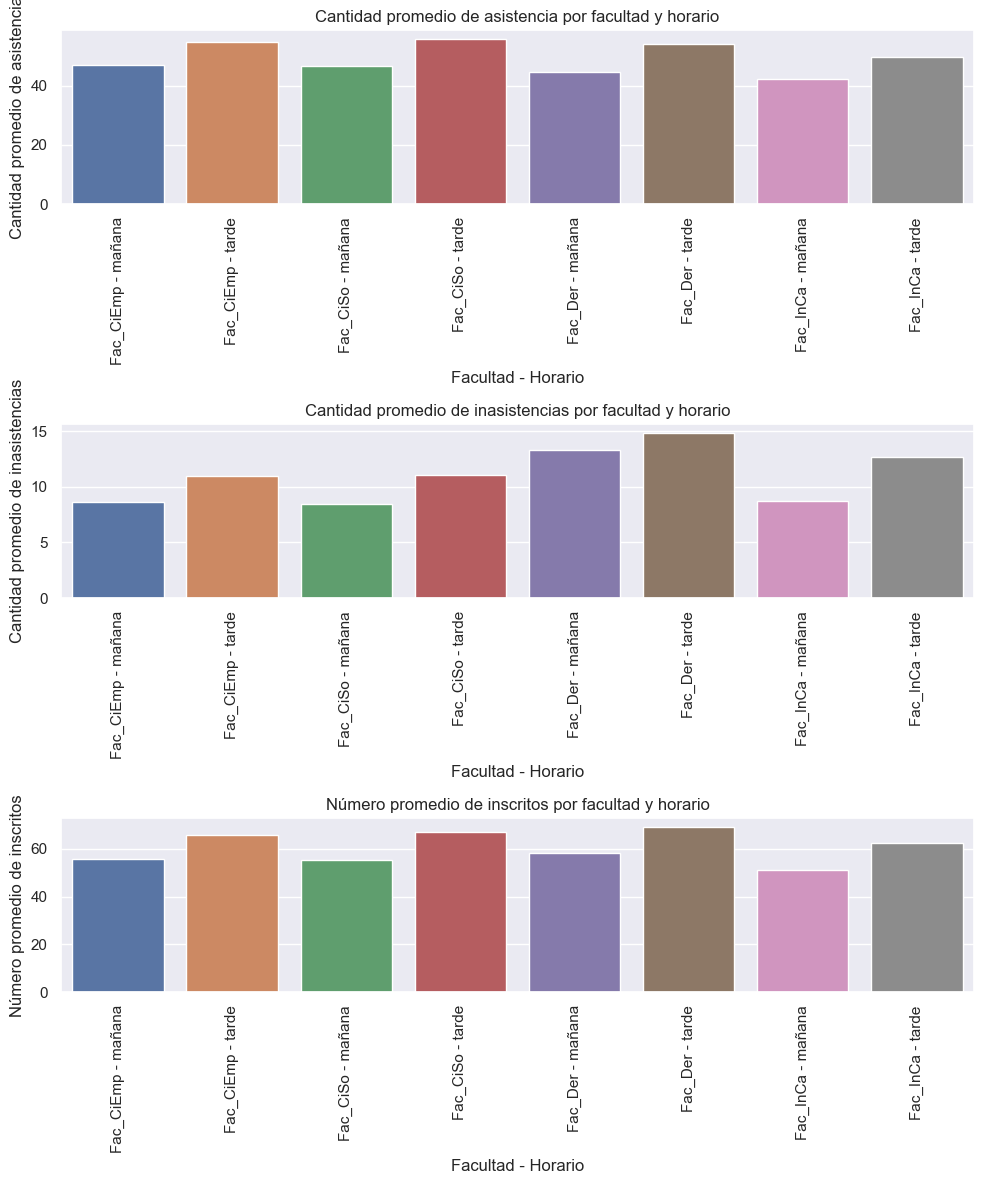

In [ ]:
# Agrupar por facultad y horario y calcular el promedio de asistencias, inasistencias e inscritos
facultad_horario_avg_asistencia = dfAsis.groupby(['facultad', 'horario'])['asistencia'].mean().reset_index()
facultad_horario_avg_inasistencias = dfAsis.groupby(['facultad', 'horario'])['inasistencia'].mean().reset_index()
facultad_horario_avg_inscritos = dfAsis.groupby(['facultad', 'horario'])['inscritos'].mean().reset_index()

# Crear la figura y los subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Concatenar los nombres de facultad y horario en una nueva columna 'facultad_horario'
facultad_horario_avg_asistencia['facultad_horario'] = facultad_horario_avg_asistencia.apply(lambda row: f"{row['facultad']} - {row['horario']}", axis=1)

# Graficar el gráfico de barra de asistencia por horario
sns.barplot(x='facultad_horario', y='asistencia', data=facultad_horario_avg_asistencia, ax=ax1)
ax1.set_xlabel('Facultad - Horario')
ax1.set_ylabel('Cantidad promedio de asistencia')
ax1.set_title('Cantidad promedio de asistencia por facultad y horario')
ax1.tick_params(axis='x', rotation=90)

# Concatenar los nombres de facultad y horario en una nueva columna 'facultad_horario'
facultad_horario_avg_inasistencias['facultad_horario'] = facultad_horario_avg_inasistencias.apply(lambda row: f"{row['facultad']} - {row['horario']}", axis=1)

# Graficar el gráfico de barra de inasistencias por horario
sns.barplot(x='facultad_horario', y='inasistencia', data=facultad_horario_avg_inasistencias, ax=ax2)
ax2.set_xlabel('Facultad - Horario')
ax2.set_ylabel('Cantidad promedio de inasistencias')
ax2.set_title('Cantidad promedio de inasistencias por facultad y horario')
ax2.tick_params(axis='x', rotation=90)

# Concatenar los nombres de facultad y horario en una nueva columna 'facultad_horario'
facultad_horario_avg_inscritos['facultad_horario'] = facultad_horario_avg_inscritos.apply(lambda row: f"{row['facultad']} - {row['horario']}", axis=1)

# Graficar el gráfico de barra de inscritos por horario
sns.barplot(x='facultad_horario', y='inscritos', data=facultad_horario_avg_inscritos, ax=ax3)
ax3.set_xlabel('Facultad - Horario')
ax3.set_ylabel('Número promedio de inscritos')
ax3.set_title('Número promedio de inscritos por facultad y horario')
ax3.tick_params(axis='x', rotation=90)

# Ajustar la distancia entre los subgráficos
fig.tight_layout()

# Mostrar el gráfico
plt.show()

Limpieza de datos 20% 

In [ ]:
# Validacion de datos nulos para la opsd_examinados
dfExam.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       4579 non-null   object
 1   codigo      4579 non-null   object
 2   facultad    4579 non-null   object
 3   area        4579 non-null   object
 4   materia     4579 non-null   object
 5   seccion     4579 non-null   int64 
 6   horario     4579 non-null   object
 7   dias        4579 non-null   object
 8   evaluacion  4579 non-null   object
 9   tipo        4579 non-null   object
 10  inscritos   4579 non-null   int64 
 11  examinados  4579 non-null   int64 
 12  modalidad   4579 non-null   object
dtypes: int64(3), object(10)
memory usage: 465.2+ KB


In [ ]:
dfExam.notnull()


,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,True,True,True,True,True,True,True,True,True,True,True,True,True
4577,True,True,True,True,True,True,True,True,True,True,True,True,True
4578,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Validacion de datos duplicados para la dfExam

dfExam.drop_duplicates()

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,2023-02-16,PUB1-H,Facultad de Ciencias Sociales,COMUNICACIONES,PUBLICIDAD I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,15,14,PRESENCIAL
1,2023-02-16,MAT2-E,Facultad de Informática y Ciencias Aplicadas,CIENCIAS APLICADAS AREA INDUSTRIAL Y MATEMATICAS,MATEMÁTICA II,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,19,17,PRESENCIAL
2,2023-02-16,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,88,85,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Facultad de Ciencias Empresariales,NEGOCIOS,FINANZAS EMPRESARIALES,4,16:00-19:00,Sab,CUARTA,DIFERIDA,75,1,EN LINEA
4577,2023-05-27,ING2-H,Facultad de Ciencias Sociales,IDIOMAS,INGLÉS II,8,13:00-16:00,Sab,CUARTA,DIFERIDA,74,1,EN LINEA
4578,2023-05-27,DEC3-D06,Facultad de Derecho,DERECHO,DERECHO CIVIL III,1,06:30-08:00,Lu-Vie,CUARTA,DIFERIDA,73,2,EN LINEA


In [ ]:
# validando que seran utililes las columnas categoricas

cols_cat=['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'modalidad']
for col in cols_cat:
  print(f'columna {col}: {dfExam[col].nunique()} subniveles')

columna fecha: 84 subniveles
columna codigo: 570 subniveles
columna facultad: 4 subniveles
columna area: 9 subniveles
columna materia: 424 subniveles
columna seccion: 26 subniveles
columna horario: 18 subniveles
columna dias: 15 subniveles
columna modalidad: 3 subniveles


In [ ]:
fecha_counts = dfExam.groupby(['codigo', 'horario', 'seccion'])['fecha'].nunique()

# Filtrar los registros en los que hay más de una fecha

indices_a_eliminar = fecha_counts[fecha_counts == 1].index

# Eliminar los registros correspondientes a las combinaciones de código, horario y sección con una única fecha

dfAsis = dfExam[~dfExam.set_index(['codigo', 'horario', 'seccion']).index.isin(indices_a_eliminar)]

# Mostrar el DataFrame resultante

dfExam

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,2023-02-16,PUB1-H,Facultad de Ciencias Sociales,COMUNICACIONES,PUBLICIDAD I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,15,14,PRESENCIAL
1,2023-02-16,MAT2-E,Facultad de Informática y Ciencias Aplicadas,CIENCIAS APLICADAS AREA INDUSTRIAL Y MATEMATICAS,MATEMÁTICA II,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,19,17,PRESENCIAL
2,2023-02-16,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,88,85,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Facultad de Ciencias Empresariales,NEGOCIOS,FINANZAS EMPRESARIALES,4,16:00-19:00,Sab,CUARTA,DIFERIDA,75,1,EN LINEA
4577,2023-05-27,ING2-H,Facultad de Ciencias Sociales,IDIOMAS,INGLÉS II,8,13:00-16:00,Sab,CUARTA,DIFERIDA,74,1,EN LINEA
4578,2023-05-27,DEC3-D06,Facultad de Derecho,DERECHO,DERECHO CIVIL III,1,06:30-08:00,Lu-Vie,CUARTA,DIFERIDA,73,2,EN LINEA


In [ ]:
dfExam.describe().head(8)#

,seccion,inscritos,examinados
count,4579.000000,4579.000000,4579.000000
mean,2.694038,59.797991,42.709762
std,3.335878,33.041173,33.010117
...,...,...,...
50%,1.000000,56.000000,39.000000
75%,3.000000,86.000000,67.000000
max,27.000000,141.000000,133.000000


In [ ]:
# Validadndo si existen en el dataframe filas repetidas

print(f"tamaño del DF antes de eliminar filas repetidas: {dfExam.shape}")
dfExam.drop_duplicates(inplace=True)
print(f'tamaño del DF antes de eliminar filas repetidas: {dfExam.shape}')

tamaño del DF antes de eliminar filas repetidas: (4579, 13)
tamaño del DF antes de eliminar filas repetidas: (4579, 13)


In [ ]:
#haciendo busqueda de un registro nos damos cuenta que hay registros con espacios en blanco
datos_filtrados = dfExam[dfExam['codigo'] == 'DEME-D']
datos_filtrados

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
18,2023-02-16,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,5,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,29,27,EN LINEA
24,2023-02-16,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,72,71,EN LINEA
80,2023-02-16,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,2,17:00-18:30,Ma-Jue,PRIMERA,ORDINARIA,72,70,EN LINEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,2023-05-21,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,4,07:00-10:00,Dom,CUARTA,ORDINARIA,63,55,EN LINEA
4432,2023-05-21,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,4,07:00-10:00,Dom,TERCERA,DIFERIDA,63,1,EN LINEA
4574,2023-05-27,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,3,13:00-16:00,Sab,CUARTA,DIFERIDA,49,0,EN LINEA


In [ ]:
# limpiar espacios en blancos
# Iterarando sobre las columnas del DataFrame
for columna in dfExam.columns:
    # Verificando si las columnas son de tipo string
    if dfExam[columna].dtype == 'object':
        # Eliminando los espacios en blanco de cada registro en las columnas coinsidentes
        dfExam[columna] = dfExam[columna].str.strip()
datos_filtrados = dfExam[dfExam['codigo'] == 'DEME-D']
datos_filtrados

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
18,2023-02-16,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,5,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,29,27,EN LINEA
24,2023-02-16,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,72,71,EN LINEA
80,2023-02-16,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,2,17:00-18:30,Ma-Jue,PRIMERA,ORDINARIA,72,70,EN LINEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,2023-05-21,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,4,07:00-10:00,Dom,CUARTA,ORDINARIA,63,55,EN LINEA
4432,2023-05-21,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,4,07:00-10:00,Dom,TERCERA,DIFERIDA,63,1,EN LINEA
4574,2023-05-27,DEME-D,Facultad de Derecho,DERECHO,DERECHO MERCANTIL,3,13:00-16:00,Sab,CUARTA,DIFERIDA,49,0,EN LINEA


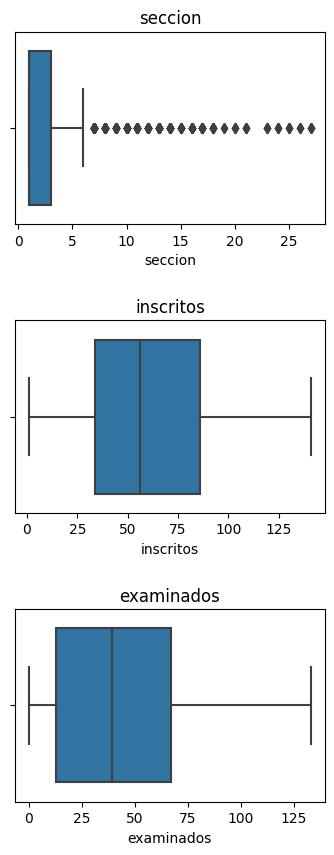

In [ ]:
#validando valores extremos de las columnas numericas

cols_num=['seccion', 'inscritos', 'examinados']
fig, ax=plt.subplots(nrows=3,ncols=1,figsize=(4,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num): 
    sns.boxplot(x=col,data=dfExam,ax=ax[i])
    ax[i].set_title(col)

In [ ]:
# Eliminando valores mayores a 133 usando el "outler"

print(f"tamaño del DF antes de eliminar filas repetidas: {dfExam.shape}")
dfExam=dfExam[dfExam['examinados']<=133]
print(f'tamaño del DF antes de eliminar filas repetidas: {dfExam.shape}')


tamaño del DF antes de eliminar filas repetidas: (4579, 13)
tamaño del DF antes de eliminar filas repetidas: (4579, 13)


In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transExam = dfExam['examinados']
registros_unicos = sorted(transExam.drop_duplicates()) 

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')


Sección 1:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
---
Sección 2:
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
---
Sección 3:
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133]
---


In [ ]:
transColums=dfExam.columns
transColums#mostrando columnas actuales

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'evaluacion', 'tipo', 'inscritos', 'examinados', 'modalidad'],
      dtype='object')

In [ ]:
#verificando registros unicos

transExam=dfExam.materia
list(transExam.drop_duplicates())

['PUBLICIDAD I',
 'MATEMÁTICA II',
 'ALGORITMOS I',
 'ÉTICA',
 'MEDIOS PUBLICITARIOS GRÁFICOS',
 'SISTEMAS OPERATIVOS',
 'REALIDAD NACIONAL',
 'DESARROLLO INDIVIDUAL',
 'PSICOLOGÍA ORGANIZACIONAL I',
 'DISEÑO INFOGRÁFICO',
 'INFORMÁTICA',
 'TÉCNICAS DE TRADUCCIONES E INTERPRETACIÓN',
 'COMPRENSIÓN AUDITIVA II',
 'EXPRESIÓN ORAL Y ESCRITA DEL ESPAÑOL',
 'RELACIONES PÚBLICAS I',
 'INGLÉS I',
 'DERECHO MERCANTIL',
 'PSICOLOGÍA GENERAL',
 'DISEÑO DE MARKETING',
 'COMPOSICIÓN INGLESA I',
 'PROGRAMACIÓN I',
 'INGLÉS II',
 'INGLÉS TÉCNICO II (MODELOS DE DECISIÓN)',
 'DERECHO PROCESAL CIVIL Y MERCANTIL I',
 'MATEMÁTICA FINANCIERA',
 'FÍSICA I',
 'GESTIÓN HOTELERA Y TURISMO',
 'PSICOLOGÍA FORENSE',
 'FORMULACIÓN Y EVALUACIÓN DE PROYECTOS',
 'DERECHO PROCESAL CIVIL Y MERCANTIL III',
 'FILOSOFÍA JURÍDICA',
 'GRAMÁTICA INGLESA PRAGMÁTICA II',
 'DIBUJO PUBLICITARIO',
 'METODOLOGÍA Y TÉCNICAS DE INVESTIGACIÓN',
 'PSICOLOGÍA COMUNITARIA',
 'FILOSOFÍA',
 'DIBUJO APLICADO',
 'CREATIVIDAD PUBLICITARIA',

In [ ]:
# creando un diccionario para mapear los nombres antiguos y cambiarlos a los nuevos
mapeo_Fac = {"Facultad de Derecho": "Fac_Der", 
            "Facultad de Informática y Ciencias Aplicadas": "Fac_InCa",
            "Facultad de Ciencias Empresariales": "Fac_CiEmp",
            "Facultad de Ciencias Sociales": "Fac_CiSo"
            }

dfExam["facultad"] = dfExam["facultad"].replace(mapeo_Fac)

# imprime la columna actualizada
print(dfExam["facultad"])


0        Fac_CiSo
1        Fac_InCa
2        Fac_InCa
          ...    
4576    Fac_CiEmp
4577     Fac_CiSo
4578      Fac_Der
Name: facultad, Length: 4579, dtype: object


In [ ]:
dfExam

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,2023-02-16,PUB1-H,Fac_CiSo,COMUNICACIONES,PUBLICIDAD I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,15,14,PRESENCIAL
1,2023-02-16,MAT2-E,Fac_InCa,CIENCIAS APLICADAS AREA INDUSTRIAL Y MATEMATICAS,MATEMÁTICA II,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,19,17,PRESENCIAL
2,2023-02-16,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,88,85,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Fac_CiEmp,NEGOCIOS,FINANZAS EMPRESARIALES,4,16:00-19:00,Sab,CUARTA,DIFERIDA,75,1,EN LINEA
4577,2023-05-27,ING2-H,Fac_CiSo,IDIOMAS,INGLÉS II,8,13:00-16:00,Sab,CUARTA,DIFERIDA,74,1,EN LINEA
4578,2023-05-27,DEC3-D06,Fac_Der,DERECHO,DERECHO CIVIL III,1,06:30-08:00,Lu-Vie,CUARTA,DIFERIDA,73,2,EN LINEA


In [ ]:
# creando un diccionario para mapear los nombres antiguos y cambiarlos a los nuevos
mapeo_Area = {"CIENCIAS APLICADAS AREA INDUSTRIAL Y MATEMATICAS": "CAAIM", 
            "CIENCIAS APLICADAS AREA ARQUITECTURA": "CAAA"
            }

dfExam["area"] = dfExam["area"].replace(mapeo_Area)

# imprime la columna actualizada
print(dfExam["area"])

0       COMUNICACIONES
1                CAAIM
2          INFORMATICA
             ...      
4576          NEGOCIOS
4577           IDIOMAS
4578           DERECHO
Name: area, Length: 4579, dtype: object


In [ ]:
dfExam

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,2023-02-16,PUB1-H,Fac_CiSo,COMUNICACIONES,PUBLICIDAD I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,15,14,PRESENCIAL
1,2023-02-16,MAT2-E,Fac_InCa,CAAIM,MATEMÁTICA II,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,19,17,PRESENCIAL
2,2023-02-16,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,88,85,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Fac_CiEmp,NEGOCIOS,FINANZAS EMPRESARIALES,4,16:00-19:00,Sab,CUARTA,DIFERIDA,75,1,EN LINEA
4577,2023-05-27,ING2-H,Fac_CiSo,IDIOMAS,INGLÉS II,8,13:00-16:00,Sab,CUARTA,DIFERIDA,74,1,EN LINEA
4578,2023-05-27,DEC3-D06,Fac_Der,DERECHO,DERECHO CIVIL III,1,06:30-08:00,Lu-Vie,CUARTA,DIFERIDA,73,2,EN LINEA


In [ ]:
df = dfExam
df

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,2023-02-16,PUB1-H,Fac_CiSo,COMUNICACIONES,PUBLICIDAD I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,15,14,PRESENCIAL
1,2023-02-16,MAT2-E,Fac_InCa,CAAIM,MATEMÁTICA II,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,19,17,PRESENCIAL
2,2023-02-16,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,88,85,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Fac_CiEmp,NEGOCIOS,FINANZAS EMPRESARIALES,4,16:00-19:00,Sab,CUARTA,DIFERIDA,75,1,EN LINEA
4577,2023-05-27,ING2-H,Fac_CiSo,IDIOMAS,INGLÉS II,8,13:00-16:00,Sab,CUARTA,DIFERIDA,74,1,EN LINEA
4578,2023-05-27,DEC3-D06,Fac_Der,DERECHO,DERECHO CIVIL III,1,06:30-08:00,Lu-Vie,CUARTA,DIFERIDA,73,2,EN LINEA


In [ ]:
# Contar el número de fechas para cada combinación de código, horario y sección
fecha_counts = dfExam.groupby(['codigo', 'horario', 'seccion'])['fecha'].nunique()

# Filtrar los registros en los que hay más de una fecha
indices_a_eliminar = fecha_counts[fecha_counts == 1].index

# Eliminar los registros correspondientes a las combinaciones de código, horario y sección con una única fecha
dfExam = dfExam[~dfExam.set_index(['codigo', 'horario', 'seccion']).index.isin(indices_a_eliminar)]

# Mostrar el DataFrame resultante
dfExam

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,2023-02-16,PUB1-H,Fac_CiSo,COMUNICACIONES,PUBLICIDAD I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,15,14,PRESENCIAL
1,2023-02-16,MAT2-E,Fac_InCa,CAAIM,MATEMÁTICA II,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,19,17,PRESENCIAL
2,2023-02-16,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,88,85,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Fac_CiEmp,NEGOCIOS,FINANZAS EMPRESARIALES,4,16:00-19:00,Sab,CUARTA,DIFERIDA,75,1,EN LINEA
4577,2023-05-27,ING2-H,Fac_CiSo,IDIOMAS,INGLÉS II,8,13:00-16:00,Sab,CUARTA,DIFERIDA,74,1,EN LINEA
4578,2023-05-27,DEC3-D06,Fac_Der,DERECHO,DERECHO CIVIL III,1,06:30-08:00,Lu-Vie,CUARTA,DIFERIDA,73,2,EN LINEA


In [ ]:
dfExam = dfExam.drop(dfExam[(dfExam['examinados'] > dfExam['inscritos']) | (dfExam['inscritos'] 
        < 0.9 * dfExam['examinados'])].index)

dfExam

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,2023-02-16,PUB1-H,Fac_CiSo,COMUNICACIONES,PUBLICIDAD I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,15,14,PRESENCIAL
1,2023-02-16,MAT2-E,Fac_InCa,CAAIM,MATEMÁTICA II,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,19,17,PRESENCIAL
2,2023-02-16,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,88,85,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Fac_CiEmp,NEGOCIOS,FINANZAS EMPRESARIALES,4,16:00-19:00,Sab,CUARTA,DIFERIDA,75,1,EN LINEA
4577,2023-05-27,ING2-H,Fac_CiSo,IDIOMAS,INGLÉS II,8,13:00-16:00,Sab,CUARTA,DIFERIDA,74,1,EN LINEA
4578,2023-05-27,DEC3-D06,Fac_Der,DERECHO,DERECHO CIVIL III,1,06:30-08:00,Lu-Vie,CUARTA,DIFERIDA,73,2,EN LINEA


Transformación de datos 20%

In [ ]:
# Definimos el umbral del valor que vamos a sustituir
umbral = 5

media_examinados = dfExam.groupby(['codigo', 'horario', 'dias'])['examinados'].mean().round()

for index, row in dfExam.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    examinados = row['examinados']
    inscritos = row['inscritos']

    # Verificar si el valor está dentro del umbral
    if examinados < umbral:
        # Verificar si cumple las condiciones de código, horario y días
        if (codigo, horario, dias) in media_examinados.index:
            # Calcular la media de examinados para el código, horario y días específicos
            media = media_examinados[(codigo, horario, dias)]
            
            # Sustituir el valor dentro del umbral por la media de examinados
            dfExam.at[index, 'examinados'] = media
        else:
            pass

    # Verificar si los examinados es mayor que los inscritos
    if examinados > inscritos:
        # Obtener i los examinados más altos dentro del rango de opciones anteriores
        examinados_total = dfAsis[(dfExam['codigo'] == codigo) & (dfExam['horario'] == horario) & (dfExam['dias'] == dias)]['examinados'].max()
        
        # Sustituir el valor de examinados por la examinados máxima
        dfExam.at[index, 'examinados'] = examinados_total
dfExam

,fecha,codigo,facultad,area,materia,seccion,horario,dias,evaluacion,tipo,inscritos,examinados,modalidad
0,2023-02-16,PUB1-H,Fac_CiSo,COMUNICACIONES,PUBLICIDAD I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,15,14,PRESENCIAL
1,2023-02-16,MAT2-E,Fac_InCa,CAAIM,MATEMÁTICA II,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,19,17,PRESENCIAL
2,2023-02-16,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,PRIMERA,ORDINARIA,88,85,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Fac_CiEmp,NEGOCIOS,FINANZAS EMPRESARIALES,4,16:00-19:00,Sab,CUARTA,DIFERIDA,75,31,EN LINEA
4577,2023-05-27,ING2-H,Fac_CiSo,IDIOMAS,INGLÉS II,8,13:00-16:00,Sab,CUARTA,DIFERIDA,74,38,EN LINEA
4578,2023-05-27,DEC3-D06,Fac_Der,DERECHO,DERECHO CIVIL III,1,06:30-08:00,Lu-Vie,CUARTA,DIFERIDA,73,34,EN LINEA


In [ ]:
# Calcular la columna de No examinados
dfExam = dfExam.assign(NoExaminados=dfExam['inscritos'] - dfExam['examinados'])

# Mostrar el DataFrame resultante
dfExam

,fecha,codigo,facultad,area,materia,seccion,...,evaluacion,tipo,inscritos,examinados,modalidad,NoExaminados
0,2023-02-16,PUB1-H,Fac_CiSo,COMUNICACIONES,PUBLICIDAD I,1,...,PRIMERA,ORDINARIA,15,14,PRESENCIAL,1
1,2023-02-16,MAT2-E,Fac_InCa,CAAIM,MATEMÁTICA II,1,...,PRIMERA,ORDINARIA,19,17,PRESENCIAL,2
2,2023-02-16,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,...,PRIMERA,ORDINARIA,88,85,PRESENCIAL,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,2023-05-27,FIEM-E,Fac_CiEmp,NEGOCIOS,FINANZAS EMPRESARIALES,4,...,CUARTA,DIFERIDA,75,31,EN LINEA,44
4577,2023-05-27,ING2-H,Fac_CiSo,IDIOMAS,INGLÉS II,8,...,CUARTA,DIFERIDA,74,38,EN LINEA,36
4578,2023-05-27,DEC3-D06,Fac_Der,DERECHO,DERECHO CIVIL III,1,...,CUARTA,DIFERIDA,73,34,EN LINEA,39


In [ ]:
# Reemplazar los rangos de horarios por "mañana" y "tarde"
dfExam['horario'] = dfExam['horario'].str.replace(r'^\d{2}:\d{2}-\d{2}:\d{2}$', 'mañana', regex=True)
dfExam['horario'] = dfExam['horario'].str.replace(r'^\d{2}:\d{2}-\d{2}:\d{2}/\d{2}:\d{2}-\d{2}:\d{2}$', 'tarde', regex=True)

In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transExam = dfExam['horario']
registros_unicos = sorted(transExam.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
['mañana', 'tarde']
---


In [ ]:
# Creando diccionario para mapear meses
meses = {
    '01': 'ENERO',
    '02': 'FEBRERO',
    '03': 'MARZO',
    '04': 'ABRIL',
    '05': 'MAYO',
    '06': 'JUNIO'
}

dfExam['fecha'] = pd.to_datetime(dfExam['fecha']).dt.strftime('%m-%Y')
dfExam['fecha'] = dfExam['fecha'].str.split('-', expand=True)[0].map(meses) + ' ' + dfExam['fecha'].str.split('-', expand=True)[1]


In [ ]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transExam = dfExam['fecha']
registros_unicos = sorted(transExam.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
['ABRIL 2023', 'FEBRERO 2023', 'MARZO 2023', 'MAYO 2023']
---


In [ ]:
# Verificar si los examinados es mayor a los inscritos y sustituir el valor
for index, row in dfExam.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    examinados = row['examinados']
    inscritos = row['inscritos']
    
    if examinados > inscritos:
        # Verificar si el código corresponde con el día y horario específico
        media_examinados = dfExam[(dfExam['codigo'] == codigo) & (dfExam['horario'] == horario) & (dfExam['dias'] == dias)]['examinados'].mean().round()
        if not pd.isnull(media_examinados):
            # Convertir el valor de asistencia a entero eliminando los decimales
            media_examinados = int(media_examinados)
            # Sustituir el valor de asistencia por la media
            dfExam.at[index, 'examinados'] = media_examinados
# Convertir la columna "examinados" a tipo de datos entero
dfExam['examinados'] = dfExam['examinados'].astype(int)

In [ ]:
dfExam

,fecha,codigo,facultad,area,materia,seccion,...,evaluacion,tipo,inscritos,examinados,modalidad,NoExaminados
0,FEBRERO 2023,PUB1-H,Fac_CiSo,COMUNICACIONES,PUBLICIDAD I,1,...,PRIMERA,ORDINARIA,15,14,PRESENCIAL,1
1,FEBRERO 2023,MAT2-E,Fac_InCa,CAAIM,MATEMÁTICA II,1,...,PRIMERA,ORDINARIA,19,17,PRESENCIAL,2
2,FEBRERO 2023,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,...,PRIMERA,ORDINARIA,88,85,PRESENCIAL,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,MAYO 2023,FIEM-E,Fac_CiEmp,NEGOCIOS,FINANZAS EMPRESARIALES,4,...,CUARTA,DIFERIDA,75,31,EN LINEA,44
4577,MAYO 2023,ING2-H,Fac_CiSo,IDIOMAS,INGLÉS II,8,...,CUARTA,DIFERIDA,74,38,EN LINEA,36
4578,MAYO 2023,DEC3-D06,Fac_Der,DERECHO,DERECHO CIVIL III,1,...,CUARTA,DIFERIDA,73,34,EN LINEA,39


1. ¿Cuál es la tendencia entre los examinados y el número de estudiantes inscritos en cada area?

Se pretende identificar las tendencias y diferencias en la cantidad de estudiantes inscritos y examinados en cada área

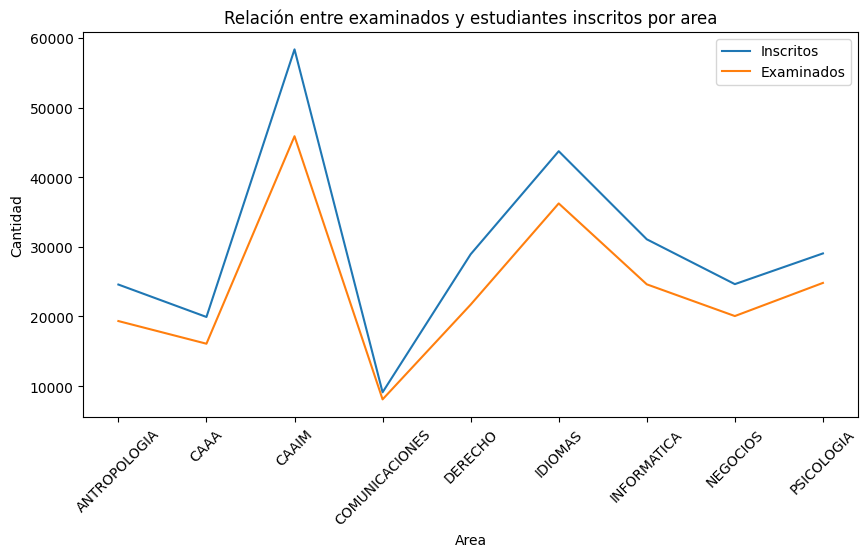

In [ ]:
df = dfExam

grupo_area = df.groupby('area').agg(estudiantes_inscritos=('inscritos', 'sum'), examinados=('examinados', 'sum')).reset_index()

plt.figure(figsize=(10, 5))

plt.plot(grupo_area['area'], grupo_area['estudiantes_inscritos'], label='Inscritos')
plt.plot(grupo_area['area'], grupo_area['examinados'], label='Examinados')

plt.title('Relación entre examinados y estudiantes inscritos por area')
plt.xlabel('Area')
plt.ylabel('Cantidad')
plt.legend()

plt.xticks(rotation=45)

plt.show()

Descripcion y analisis

Se puede analizar que la similitud entre estudiantes inscritos y examinados en alguna es de las areas la mayoría de los estudiantes que se inscriben también completan los exámenes correspondientes.

2. ¿Cual es el comportamiento de los no  examinados por las facultades?

Se pretende obtener los mayores datos de lo estudiantes que no se examinaros en las distintas facultades.

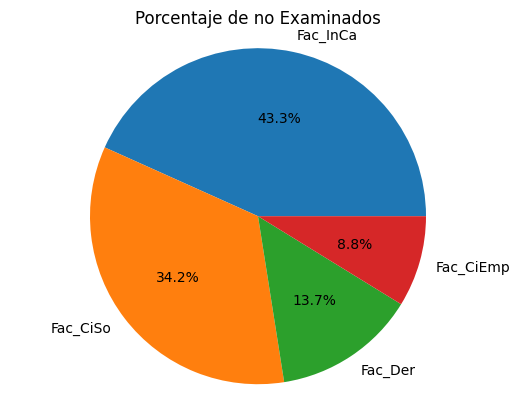

In [ ]:
# Validando la cantidad de no examinados segun factultad

df = dfExam

top_areas = df.groupby('facultad')['NoExaminados'].sum().nlargest(5)
areas = top_areas.index.tolist()
examenes = top_areas.tolist()

plt.pie(examenes, labels=areas, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Porcentaje de no Examinados')
plt.show()

Descripcion y analisis

Se puede analizar que hay 2 facultades que tienen un mayor porcentaje de no examinados en comparacion a las otras 2 facultades esto nos puede dar indicio a que las factultades con mayor porcentaje de no evaluados exita un tema el cual este afectando al que no se examinen ya sea por: tema economicos, fecha asignada para el parcial o  mala enseñanza entre otros factores.

3. Total de examinados segun evaluacion

Se pretende validar el total de evaluados segun el tipo de evaluacion que correspondas y comparar la diferencia entre ellas.

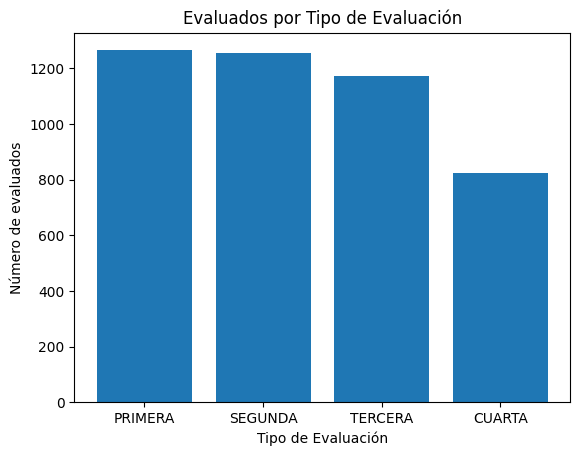

In [ ]:
df = dfExam

evaluacion_counts = df['evaluacion'].value_counts()

# Crear el gráfico de barras
plt.bar(evaluacion_counts.index, evaluacion_counts.values)

# Personalizar el gráfico
plt.xlabel('Tipo de Evaluación')
plt.ylabel('Número de evaluados')
plt.title('Evaluados por Tipo de Evaluación')

# Mostrar el gráfico
plt.show()




Descripcion y analisis

Se verifica que los examinados a medida que las evaluaciones pasan son menores lo que podemos tomar como conclusion que pueda existir desercion

4. ¿Cual es el comportamiento de los examinados por fechas y segun la horario mañana o tarde?

Se pretende verificar el total de no examinados comparando las fechas que fueron agrupas por mes y segun horario que se agrupado por mañana o tarde y validar a difencia segun horario.



<Figure size 1000x800 with 0 Axes>

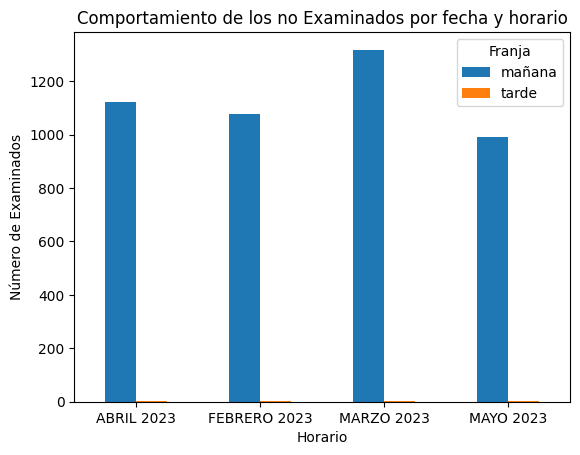

In [ ]:
df = dfExam

grupo_franja = df.groupby([df['fecha'], 'horario'])['NoExaminados'].count().unstack()

plt.figure(figsize=(10, 8))

grupo_franja.plot(kind='bar')

plt.title('Comportamiento de los no Examinados por fecha y horario')
plt.xlabel('Horario')
plt.ylabel('Número de No Examinados')
plt.legend(title='Franja')

plt.xticks(rotation=0)

plt.show()


Descripcion y analisis

Se verifica que los no examinados segun fechas son diferentes habiendo horarios donde los no evaluados son menos o mayores conforme el tiempo pasa con respecto de mañana lo que puede ocurrir a que se tenga desercion o algun otro problema con los estudiantes sin embargo se observa que por la tarde la diferencia es notable por lo que se debe anilizar el motivo de la diferencia que es menor la cantidad de no evaluados y tomar la decision y aplicarla en el horario de la mañana.

5. ¿Cuál es el promedio de examinados por area en una franja de la mañana?

Se quiere evaluar cuantos han sido los examinados en las distintas areas en la franja de la mañana


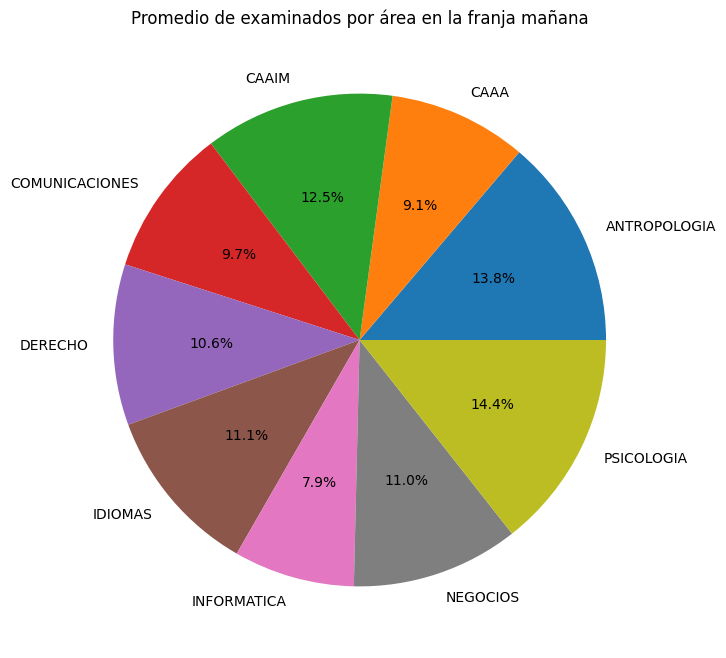

In [ ]:
df = dfExam

franja_seleccionada = 'mañana'  # Franja seleccionada
df_franja = df[df['horario'] == franja_seleccionada]

grupo_area = df_franja.groupby('area')['examinados'].mean().reset_index()

plt.figure(figsize=(8, 8))

plt.pie(grupo_area['examinados'], labels=grupo_area['area'], autopct='%1.1f%%')

plt.title('Promedio de examinados por área en la franja {}'.format(franja_seleccionada))

plt.show()

Descripcion y analisis

Se analiza que de todas las areas en la mañana la materia mas rentable para que se mantenga en horario de mañana es psicologia junto con antropologia, esto nos indica que puede a la universidad poder tener mas secciones de esas areas en el misma franja de horario.

6. ¿Cuál es el promedio de examinados vs no examinados segun evaluacion?

Se quiere evaluar la cantidad de examinados vs no examinados a medida el ciclo pasa para validar el flujo si se mantiene o es diferente

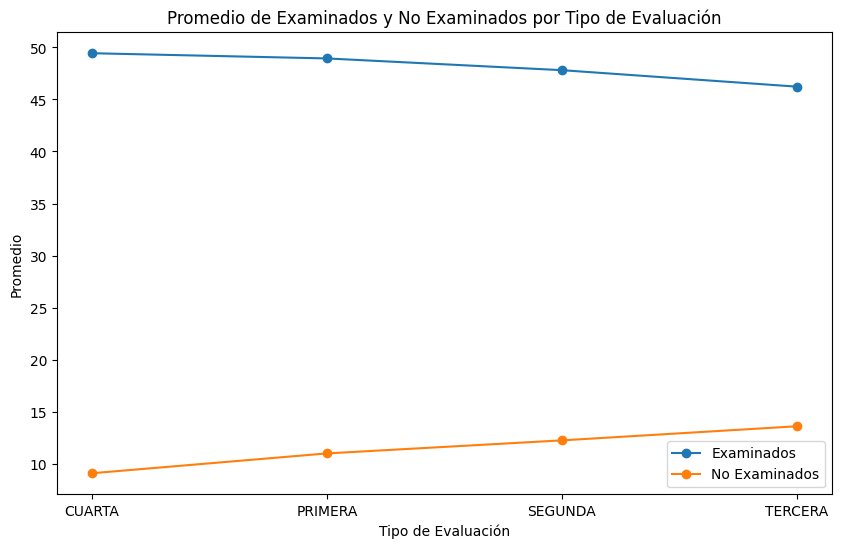

In [ ]:
df = dfExam

grupo_evaluacion = df.groupby('evaluacion').agg(promedio_examinados=('examinados', 'mean'),promedio_no_examinados=('NoExaminados', 'mean')).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grupo_evaluacion['evaluacion'], grupo_evaluacion['promedio_examinados'], label='Examinados', marker='o')
plt.plot(grupo_evaluacion['evaluacion'], grupo_evaluacion['promedio_no_examinados'], label='No Examinados', marker='o')

plt.title('Promedio de Examinados y No Examinados por Tipo de Evaluación')
plt.xlabel('Tipo de Evaluación')
plt.ylabel('Promedio')
plt.legend()

plt.show()

Descripcion y analisis

Se analiza que de todas las areas en la mañana la materia mas rentable para que se mantenga en horario de mañana es psicologia junto con antropologia, esto nos indica que puede a la universidad poder tener mas secciones de esas areas en el misma franja de horario.

7. ¿Cual es el top 5 de materias con mayor de no examinados?

Se pretende validar que materias son las que posee la menor cantidad de examinados con el objetivo de validar que sucede en esas materias.

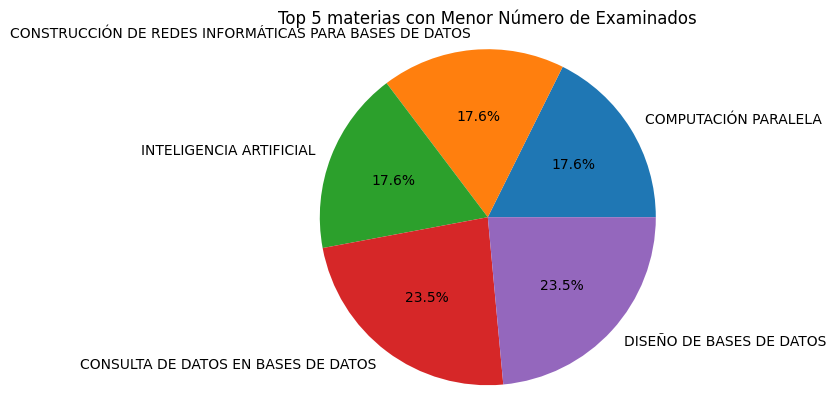

In [ ]:
df = dfExam

top_areas = df.groupby('materia')['examinados'].sum().nsmallest(5)
areas = top_areas.index.tolist()
examenes = top_areas.tolist()

plt.pie(examenes, labels=areas, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 materias con Menor Número de Examinados')
plt.show()


Descripcion y analisis

Se tiene que tomar la decision de como incentivar a los estudiantes a que se examinen validar si es tema econimico que puedan tener porroga y que el estudiante no deserte.




8. ¿Cuál es el promedio de examinados vs no examinados segun modalidad estudiada?

Se requiere evaluar cual es la diferencia entre las distintas modalidades verificando los examinados y los no examinados.

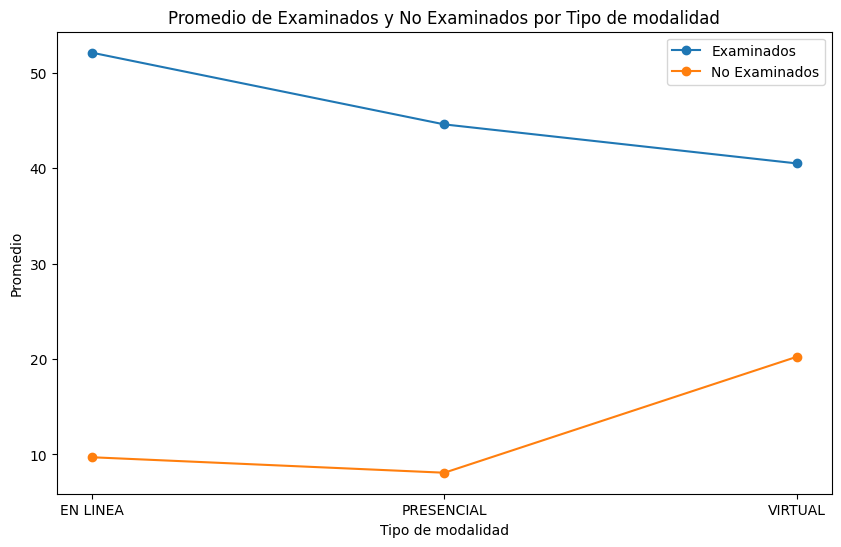

In [ ]:
df = dfExam

modalidad_evaluacion = df.groupby('modalidad').agg(promedio_examinados=('examinados', 'mean'),promedio_no_examinados=('NoExaminados', 'mean')).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(modalidad_evaluacion['modalidad'], modalidad_evaluacion['promedio_examinados'], label='Examinados', marker='o')
plt.plot(modalidad_evaluacion['modalidad'], modalidad_evaluacion['promedio_no_examinados'], label='No Examinados', marker='o')

plt.title('Promedio de Examinados y No Examinados por Tipo de modalidad')
plt.xlabel('Tipo de modalidad')
plt.ylabel('Promedio')
plt.legend()

plt.show()

Descripcion y analisis

Se analizo que la modalidad con mayor problemas es la virtual se puede deber a que el estudiante tiene la libertad de poder revisar cuando el guste lo cual ocasiona que tenga mayor cantidad de no evaluados lo cual puede tener un riesgo de decersion por lo que se debe tomar medidas como recordatorios.

9. ¿Cual es la relación entre el número de estudiantes inscritos y el número de estudiantes no examinados?

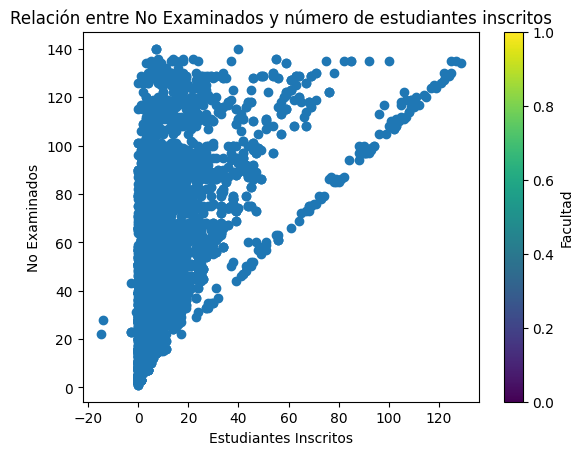

In [ ]:
plt.scatter(dfExam['NoExaminados'], dfExam['inscritos'],marker="o")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('No Examinados')
plt.title('Relación entre No Examinados y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

Descripcion y analisis

Se puede validar que hay una tendencia general de que a medida que el número de estudiantes inscritos aumenta lo cual aumenta el número de estudiantes no examinados pero también hay un número alto de estudiantes inscritos pero un número bajo de estudiantes no examinados y otras tienen un número bajo de estudiantes inscritos pero un número alto de estudiantes no examinados.

10. ¿ Cual es el comportamiento de los examinados segun Tipo de evaluacion y evaluacion correspondiente?

Se espera validar la tendencia si hay menos examinados a medida el ciclo pasa 

<Figure size 1000x800 with 0 Axes>

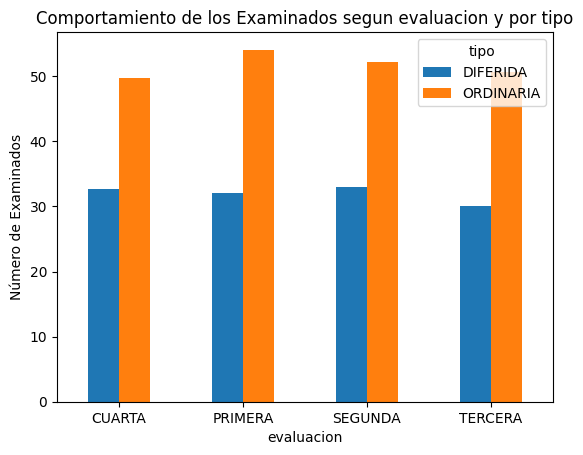

In [ ]:
df = dfExam

grupo_evaluacion = df.groupby([df['evaluacion'], 'tipo'])['examinados'].mean().unstack()

plt.figure(figsize=(10, 8))

grupo_evaluacion.plot(kind='bar')

plt.title('Comportamiento de los Examinados segun evaluacion y por tipo')
plt.xlabel('evaluacion')
plt.ylabel('Número de Examinados')
plt.legend(title='tipo')

plt.xticks(rotation=0)

plt.show()


Descripcion y analisis

Se puede validar que hay una tendencia a la baja en los examinados a medida las evaluaciones pasan sin embargo tambien se puede ver que la tendencia de la ordinaria sube lo cual puede ocasionar un equilibrio ya que aun asi los estudiantes se examinan pero tambien se puede notar que la los examinados en ordinaria disminuyen pudiendo haber riesgo de desercion. 


> ### `EXPORTACIÓN DE DATOS`

In [ ]:
dfExam.to_csv('exam_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD
dfAsis.to_csv('Asis_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD